Using TensorFlow backend.
c:\users\surya\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\surya\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\surya\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

Index(['Sentence', 'Label'], dtype='object')


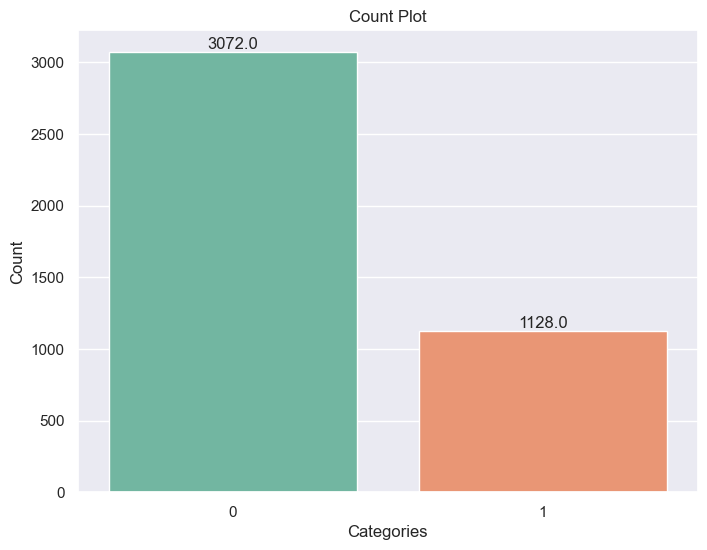

Accuracy: 92.85714285714286
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       588
           1       0.98      0.77      0.87       252

    accuracy                           0.93       840
   macro avg       0.95      0.88      0.91       840
weighted avg       0.93      0.93      0.93       840



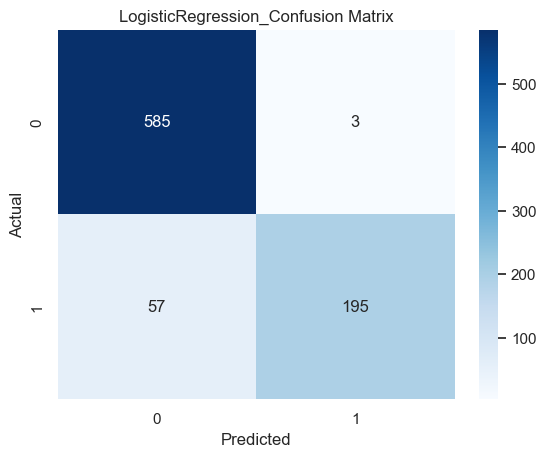

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                94360     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              11264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1025      
Total params: 110,955
Trai

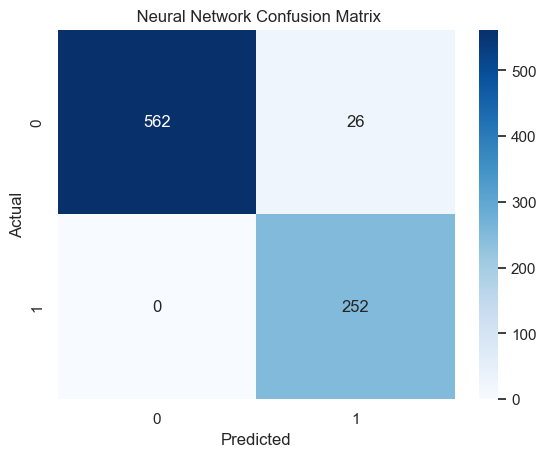

In [1]:
from tkinter import *
import tkinter
from tkinter import filedialog
import numpy as np
from tkinter.filedialog import askopenfilename
import pandas as pd 
from tkinter import simpledialog
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import os
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.linear_model import LogisticRegression
# from xml.dom import minidom
from nltk import ngrams
from nltk.tokenize import sent_tokenize
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

main = tkinter.Tk()
main.title("SQL Injection Attacl Detection")
main.geometry("1000x650")

global filename
global rnn_acc,lstm_acc
global classifier
global X, y, X_train,y_train,X_test,y_test,Predictions
global df
global le
global labels
def upload():
    global filename
    global dataset
    filename = filedialog.askopenfilename(initialdir = "dataset")
    text.delete('1.0', END)
    text.insert(END,filename+' Loaded\n\n')
    dataset= pd.read_csv(filename,encoding='utf-16')
    print(dataset.columns)
    text.insert(END,str(dataset.head))
    
def preprocess():
    global dataset
    global X, y, X_train,y_train,X_test,y_test
    global le
    text.delete('1.0', END)
    
    # Create the count plot
    sns.set(style="darkgrid")
    plt.figure(figsize=(8, 6))
    sns.countplot(data=dataset, x='Label', palette="Set2")

    # Add count labels on top of each bar
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    # Set axis labels and plot title (customize as needed)
    plt.xlabel("Categories")
    plt.ylabel("Count")
    plt.title("Count Plot")
    plt.show()
    
    vectorizer = CountVectorizer( min_df=2, max_df=0.7, stop_words=stopwords.words('english'))
    posts = vectorizer.fit_transform(dataset['Sentence'].values.astype('U')).toarray()
    transformed_posts=pd.DataFrame(posts)
    dataset=pd.concat([dataset,transformed_posts],axis=1)
    X=dataset[dataset.columns[2:]]
    y=dataset['Label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    text.insert(END,"\n\nTotal Records used for training : "+str(np.shape(X_train))+"\n")
    text.insert(END,"\n\nTotal Records used for testing : "+str(np.shape(X_test))+"\n")
    
def run_LogisticRegression():
    global X_train,y_train,X_test,y_test,y_pred
    text.delete('1.0', END)
    global clf,accuracy
    
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    # Predicting the target variable on the test data
    y_pred = clf.predict(X_test)

    # Evaluating the model's performance
    accuracy = accuracy_score(y_test, y_pred)*100
    print(f"Accuracy: {accuracy}")
    text.insert(END,"\n\n LogisticRegression Accuracy : "+str(accuracy)+"\n")

    # Printing a classification report for more detailed evaluation
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test, y_pred)
    # Create a heatmap using seaborn
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    # Set labels and title
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('LogisticRegression_Confusion Matrix')
    # Show the plot
    plt.show()



def simpleNeuralNetwork():
    global accuracy1 ,model
    # Importing essential libraries
    # Define the model filename
    input_dim = X_train.shape[1]  # Number of features
    model = Sequential()
    model.add(layers.Dense(20, input_dim=input_dim, activation='relu'))
    model.add(layers.Dense(10,  activation='tanh'))
    model.add(layers.Dense(1024, activation='relu'))

    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    model.summary()
    classifier_nn = model.fit(X_train,y_train,
                        epochs=10,
                        verbose=True,
                        validation_data=(X_test, y_test),
                        batch_size=15)
    y_pred1=model.predict(X_test)
    for i in range(len(y_pred1)):
        if y_pred1[i]>0.5:
            y_pred1[i]=1
        elif y_pred1[i]<=0.5:
            y_pred1[i]=0
    # Evaluating the model's performance
    accuracy1 = accuracy_score(y_test, y_pred1)*100
    print(f"Accuracy: {accuracy1}")
    # Printing a classification report for more detailed evaluation
    print("Classification Report:\n", classification_report(y_test, y_pred1))
    
    cm=confusion_matrix(y_test, y_pred1)
    # Create a heatmap using seaborn
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    # Set labels and title
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(' Neural Network Confusion Matrix')
    # Show the plot
    plt.show()
    text.insert(END,"\n\n Neural Network Accuracy : "+str(accuracy1)+"\n")

def predict():
    text.delete('1.0', END)
    y_pred1=model.predict(X_test)
    for i in range(len(y_pred1)):
        if y_pred1[i]>0.5:
            y_pred1[i]=1
        elif y_pred1[i]<=0.5:
            y_pred1[i]=0
    
    for i in range(len(y_pred1)):
        predict = y_pred[i]
        if predict == 0:
            Attack = 'Attack detected'
        elif predict == 1:
            Attack = 'No Attack detected'
        row_data = X_test.iloc[i].to_string(index=False)  # Get the entire row as a string
        text.insert(END, f"{row_data }{i + 1} classified as {Attack}\n\n")
    
def graph():
    plt.figure(figsize=(10,6))
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.bar(['Logistic regression', 'Simple Neural Network'], [accuracy,accuracy1], color=['red', 'green'])
    plt.title('Accuracy Comparison')
    plt.show()

def close():
    main.destroy()
    
font = ('times', 15, 'bold')
title = Label(main, text='SQL Injection Attack Detection', justify=LEFT)
title.config(bg='lavender blush', fg='DarkOrchid1')  
title.config(font=font)           
title.config(height=3, width=120)       
title.place(x=100,y=5)
title.pack()

font1 = ('times', 12, 'bold')
uploadButton = Button(main, text="Upload SQLI Dataset", command=upload)
uploadButton.place(x=10,y=100)
uploadButton.config(font=font1)  

preprocessButton = Button(main, text="Preprocess Dataset", command=preprocess)
preprocessButton.place(x=300,y=100)
preprocessButton.config(font=font1)

XGBButton = Button(main, text="LogisticRegression Classifier", command=run_LogisticRegression)
XGBButton.place(x=480,y=100)
XGBButton.config(font=font1)

adaButton = Button(main, text="Simple Neural Network", command=simpleNeuralNetwork)
adaButton.place(x=700,y=100)
adaButton.config(font=font1)

graphButton = Button(main, text="Accuracy Comparison Graph", command=graph)
graphButton.place(x=10,y=150)
graphButton.config(font=font1)

predictButton = Button(main, text="Detection using Test Data", command=predict)
predictButton.place(x=300,y=150)
predictButton.config(font=font1)

closeButton = Button(main, text="Close Application", command=close)
closeButton.place(x=10,y=200)
closeButton.config(font=font1)

font1 = ('times', 12, 'bold')
text=Text(main,height=20,width=160)
scroll=Scrollbar(text)
text.configure(yscrollcommand=scroll.set)
text.place(x=10,y=250)
text.config(font=font1) 

main.mainloop()

